<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [25]:
!pip install pandas

In [26]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [27]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-10 05:52:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  49.5MB/s    in 3.1s    

2025-07-10 05:53:02 (49.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [29]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [30]:

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



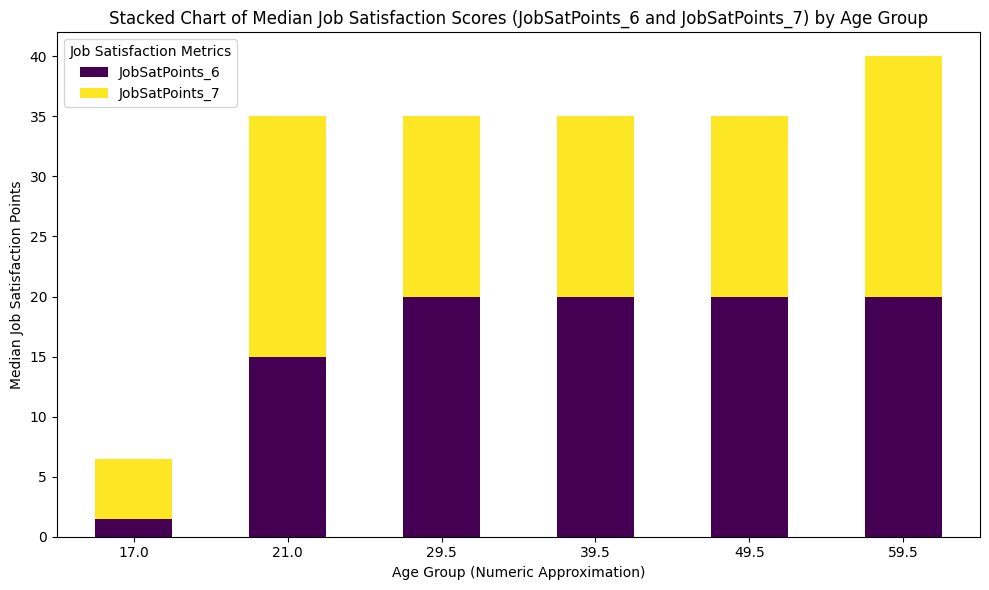

In [34]:
age_mapping = {
    'Under 18': 17,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 70,
    'Prefer not to say': None
}

# Step 1: Clean Age column by removing ' years old' suffix
df['Age_clean'] = df['Age'].str.replace(' years old', '', regex=False).str.strip()

# Step 2: Map cleaned Age strings to numeric values
df['Age_numeric'] = df['Age_clean'].map(age_mapping)


# Step 3: Convert satisfaction columns to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 4: Drop rows with missing values in the relevant columns
df_clean = df.dropna(subset=['Age_numeric', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 5: Group by age group and calculate median of JobSatPoints_6 and JobSatPoints_7
grouped = df_clean.groupby('Age_numeric')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 6: Plot stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Stacked Chart of Median Job Satisfaction Scores (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xlabel('Age Group (Numeric Approximation)')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=0)
plt.legend(title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


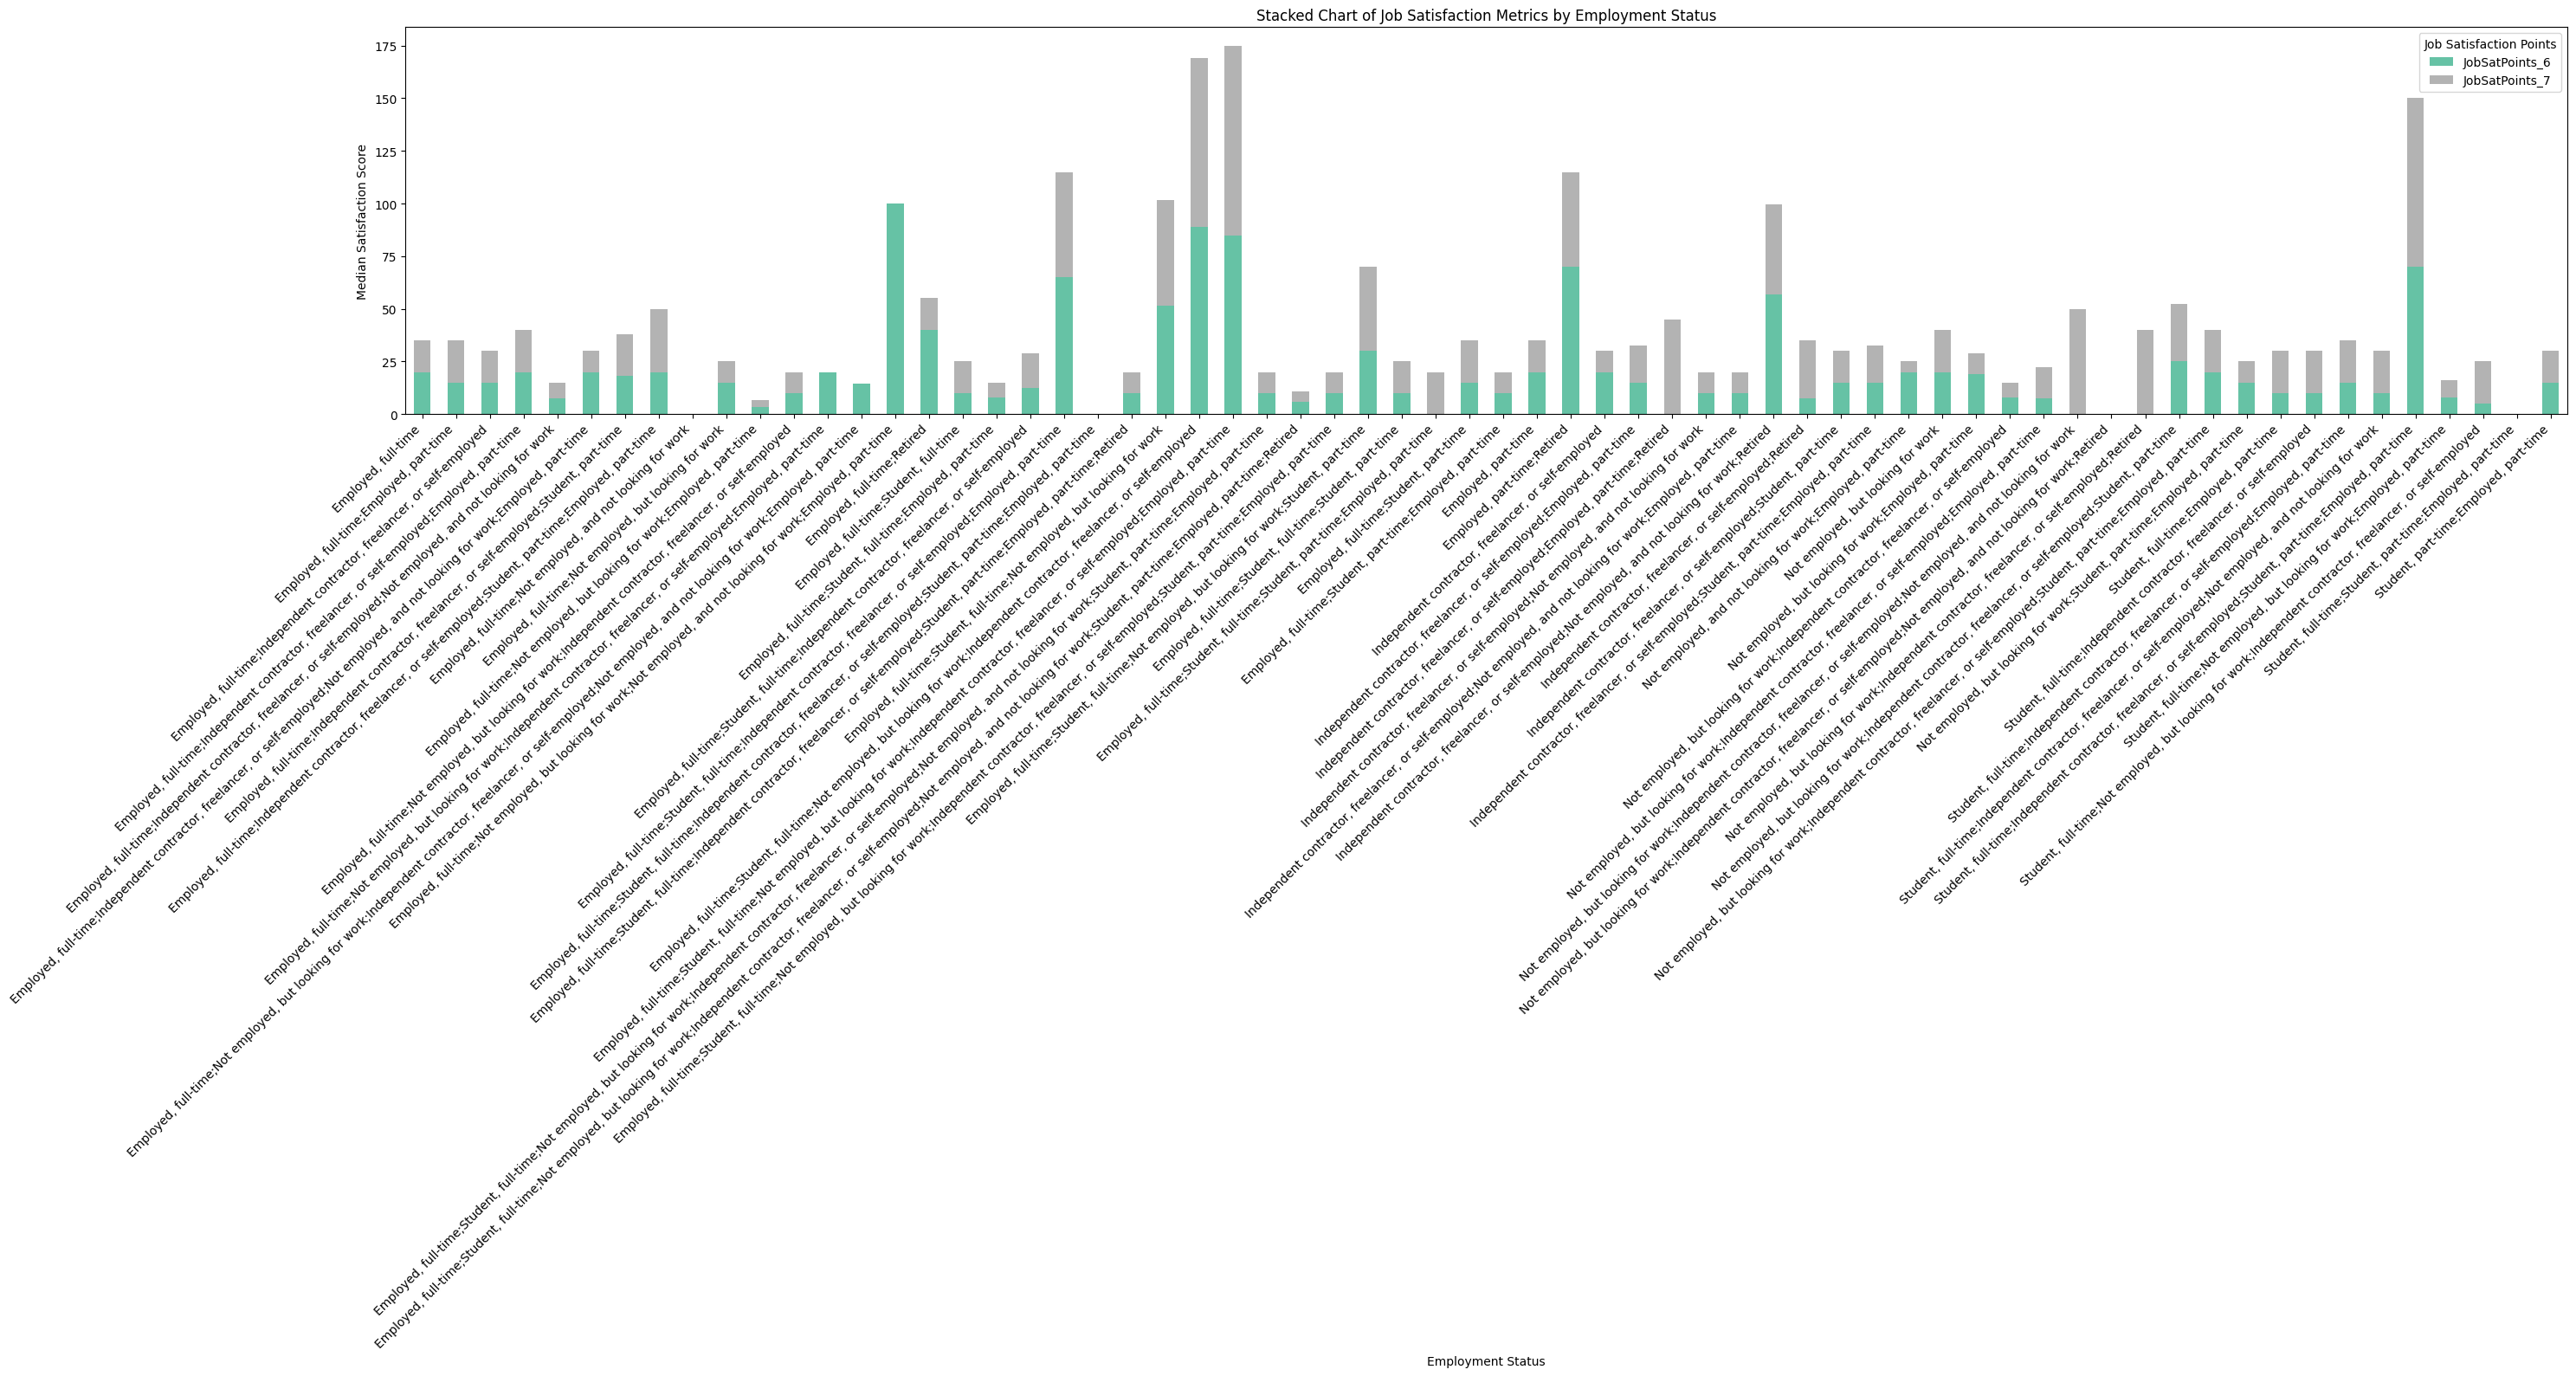

In [21]:
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 2: Drop rows with missing Employment or JobSat values
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 3: Group by Employment and calculate the median for each satisfaction metric
satisfaction_grouped = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 4: Plot the stacked bar chart
satisfaction_grouped.plot(kind='bar', stacked=True, figsize=(30, 16), colormap='Set2')

plt.title('Stacked Chart of Job Satisfaction Metrics by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


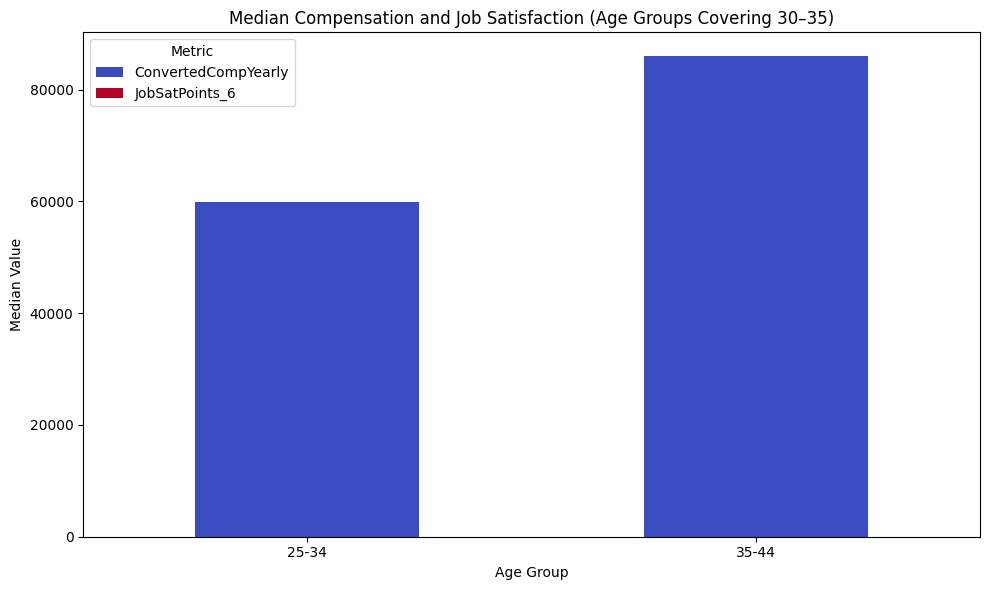

In [32]:
age_groups = ['25-34', '35-44']
df_filtered = df[df['Age_clean'].isin(age_groups)].copy()

# Step 3: Convert relevant columns to numeric, coercing errors to NaN
df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')

# Step 4: Drop rows with missing values in these columns
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Step 5: Group by Age_clean and compute median of compensation and job satisfaction
grouped = df_filtered.groupby('Age_clean')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 6: Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')

plt.title('Median Compensation and Job Satisfaction (Age Groups Covering 30–35)')
plt.xlabel('Age Group')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


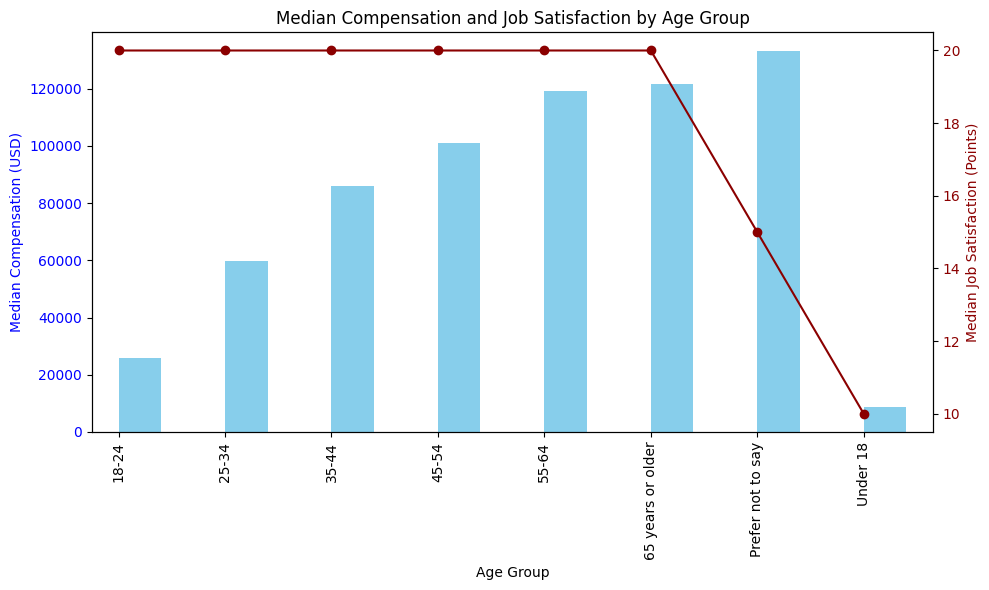

In [16]:
# 2. Convert necessary columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# 3. Drop rows with missing values
df_median = df.dropna(subset=['Age_clean', 'ConvertedCompYearly', 'JobSatPoints_6'])

# 4. Group by age and calculate medians
median_summary = df_median.groupby('Age_clean')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# 5. Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for median compensation
median_summary['ConvertedCompYearly'].plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4, label='Median Compensation')
ax1.set_ylabel('Median Compensation (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Age Group')

# Line plot for median satisfaction (secondary y-axis)
ax2 = ax1.twinx()
median_summary['JobSatPoints_6'].plot(kind='line', color='darkred', marker='o', ax=ax2, label='Median Job Satisfaction')
ax2.set_ylabel('Median Job Satisfaction (Points)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Titles and legend
plt.title('Median Compensation and Job Satisfaction by Age Group')
fig.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


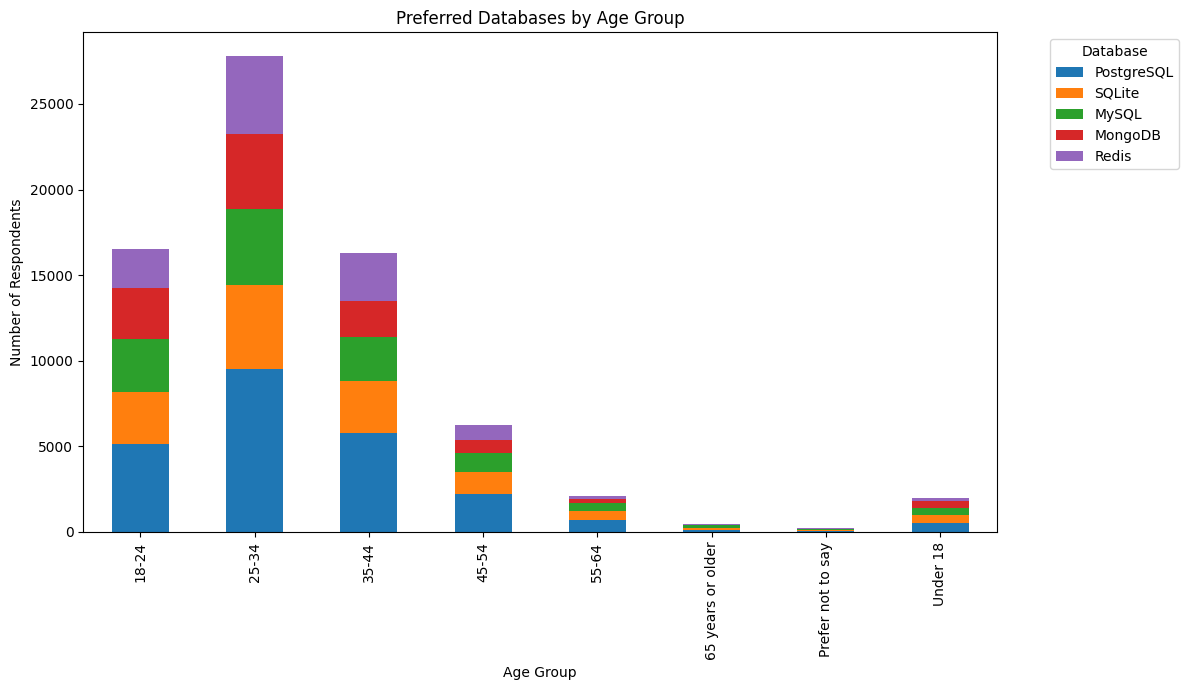

In [13]:
db_age = df[['Age_clean', 'DatabaseWantToWorkWith']].dropna()
db_age_exp = db_age.assign(DatabaseWantToWorkWith=db_age['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Count database preferences by age group
db_age_counts = db_age_exp.groupby(['Age_clean', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Optional: keep top 5 databases overall for clarity
top5_dbs = db_age_exp['DatabaseWantToWorkWith'].value_counts().head(5).index
db_age_counts_top5 = db_age_counts[top5_dbs]

# Plot stacked bar chart
db_age_counts_top5.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_2946/3016009639.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


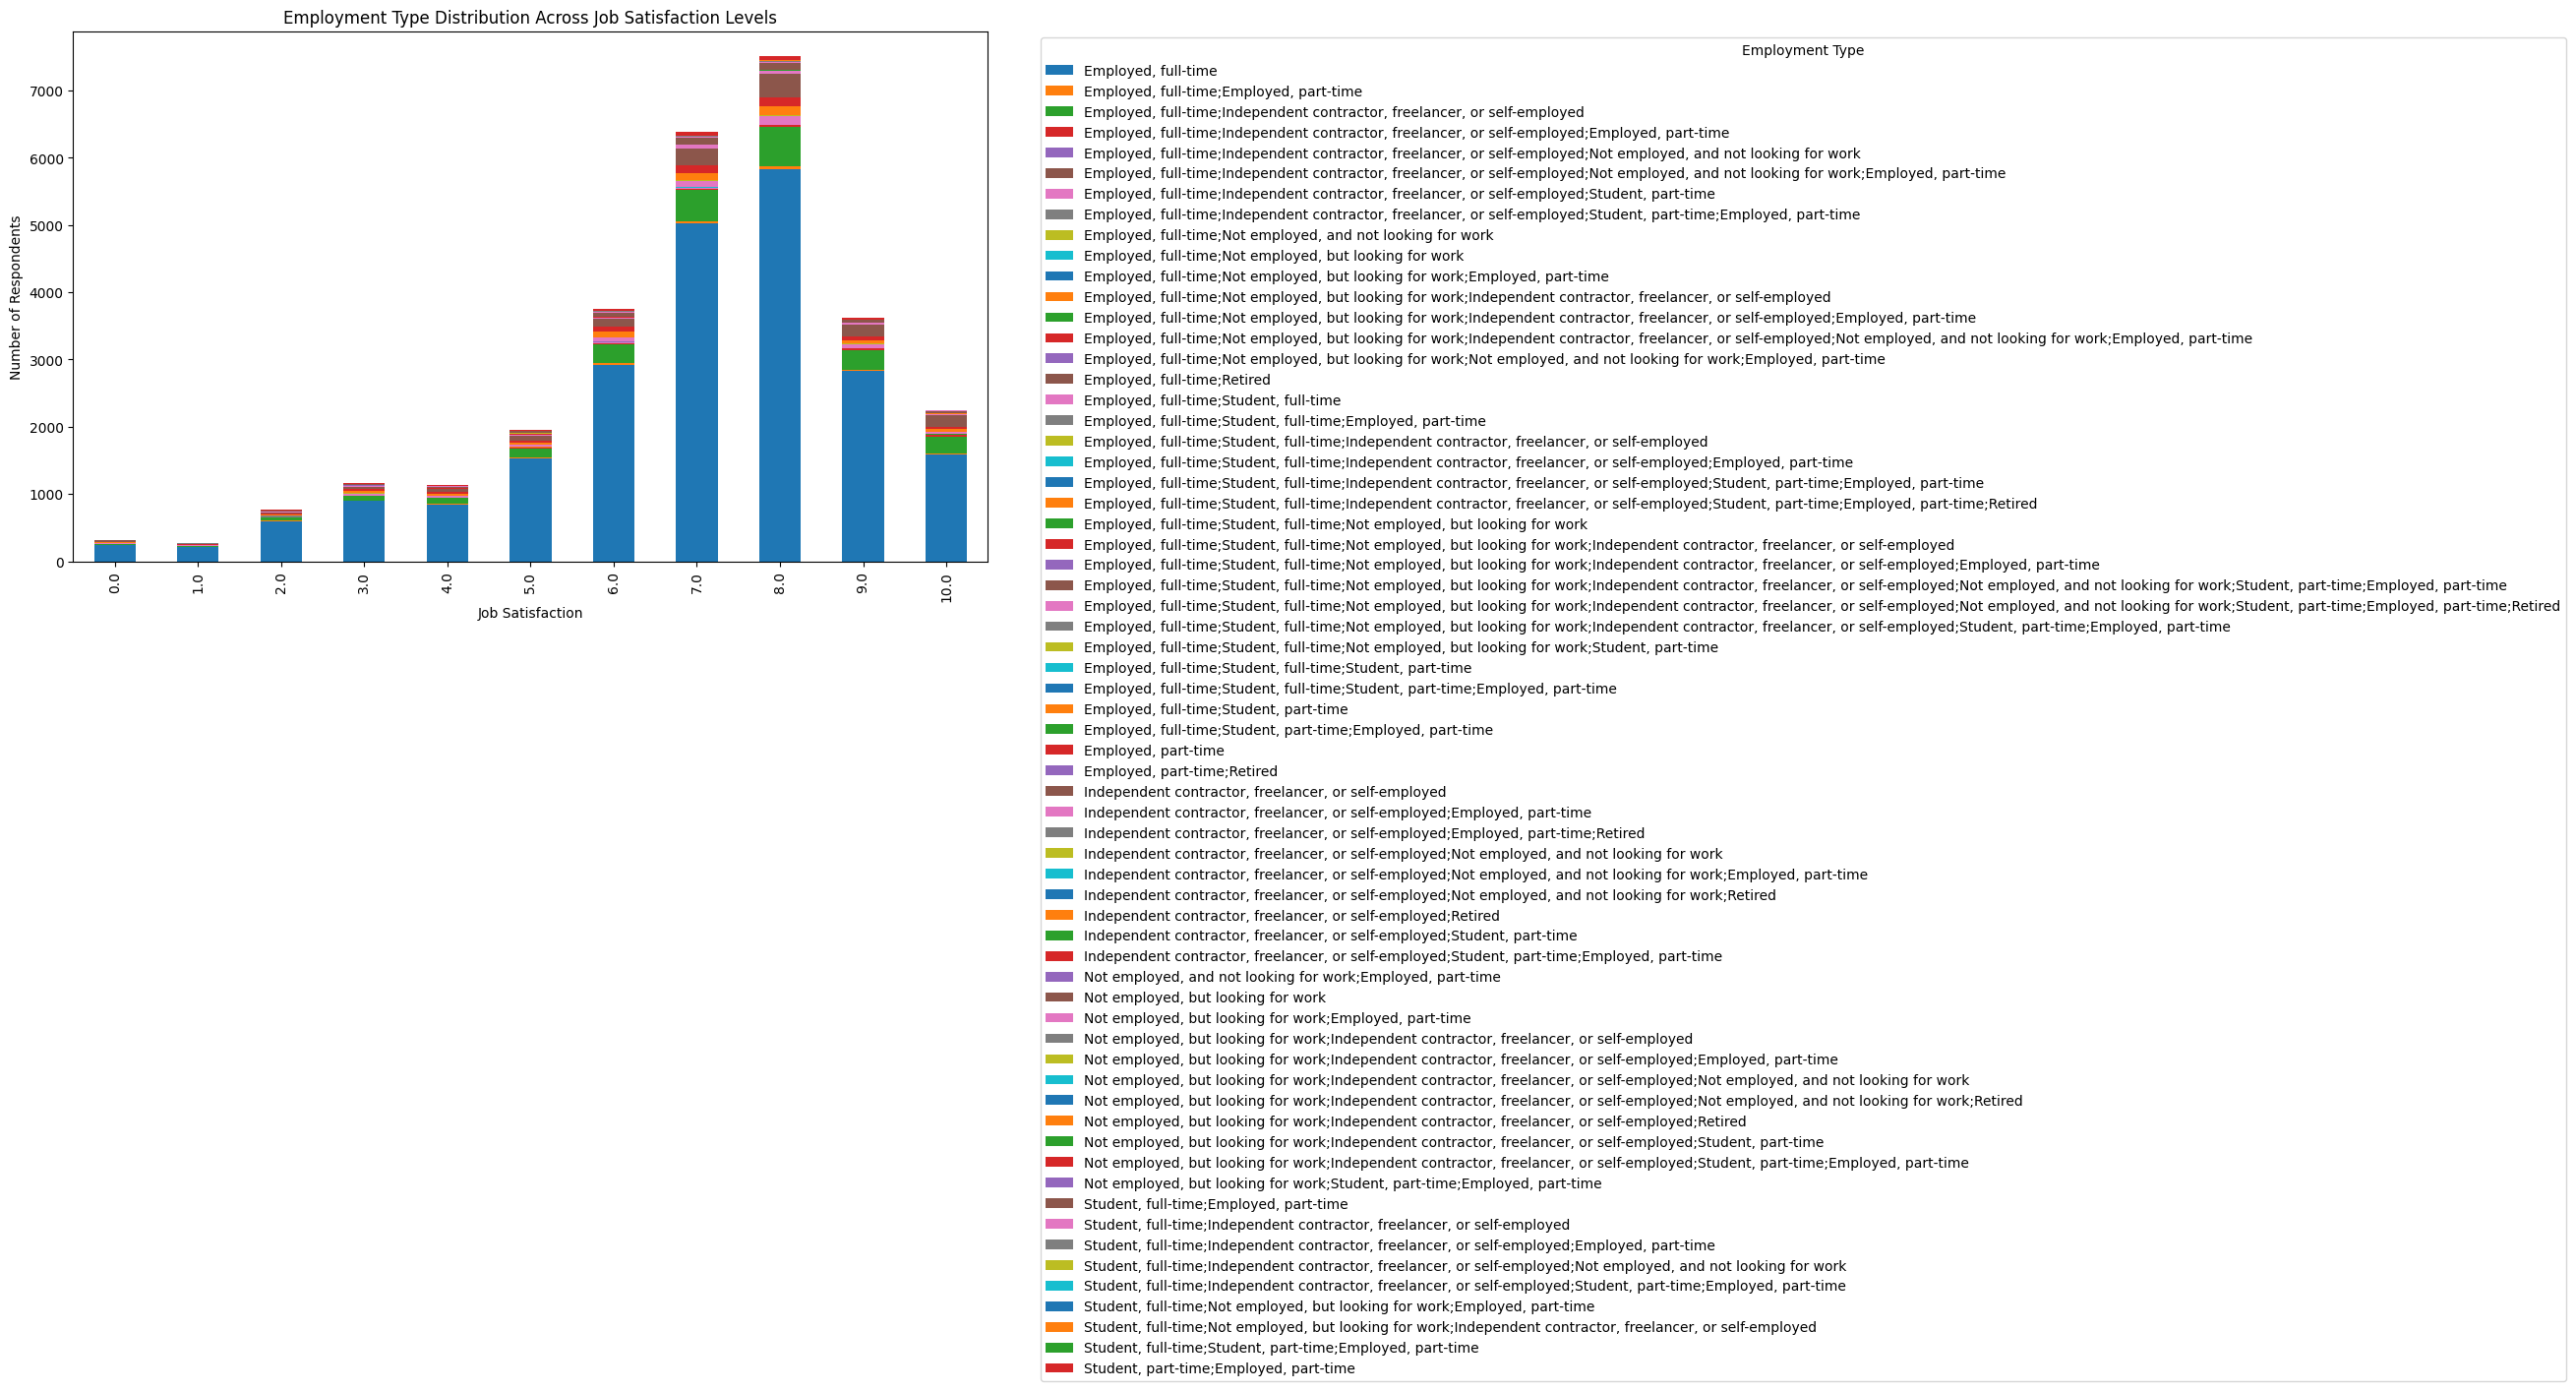

In [14]:
emp_jobsat = df[['JobSat', 'Employment']].dropna()
emp_jobsat_counts = emp_jobsat.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Plot stacked bar chart
emp_jobsat_counts.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Employment Type Distribution Across Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


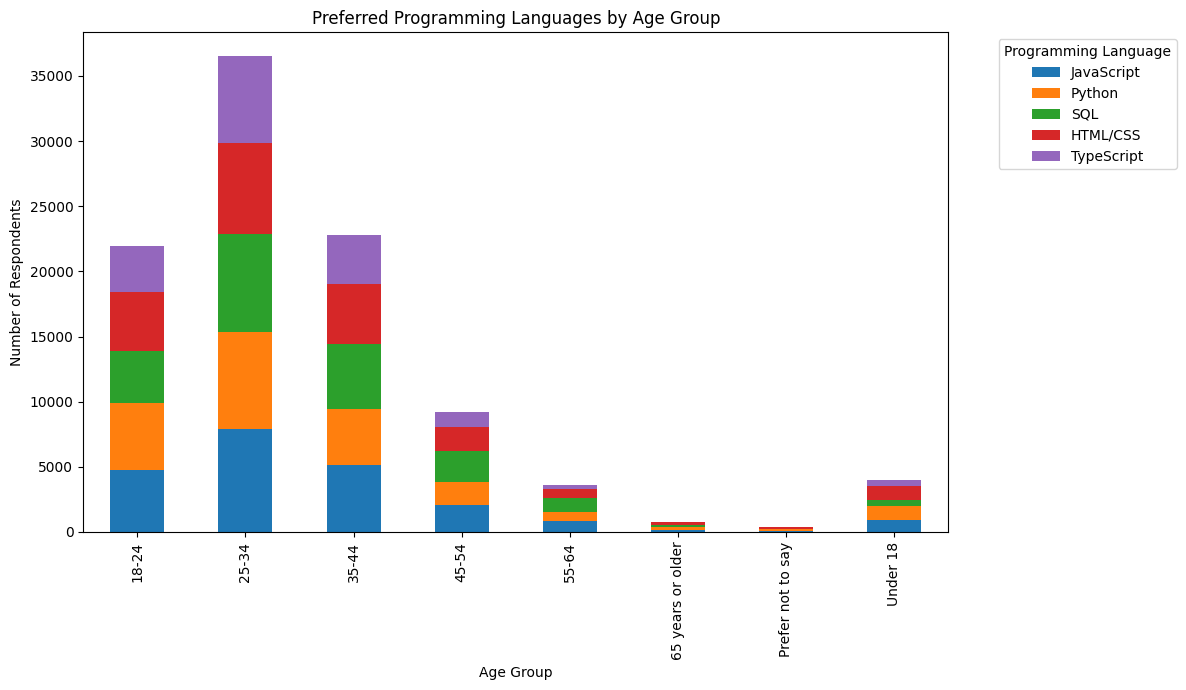

In [15]:
lang_age = df[['Age_clean', 'LanguageAdmired']].dropna()
lang_age_exp = lang_age.assign(LanguageAdmired=lang_age['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Count preferences by age group
lang_age_counts = lang_age_exp.groupby(['Age_clean', 'LanguageAdmired']).size().unstack(fill_value=0)

# Optional: select top 5 languages overall
top5_langs = lang_age_exp['LanguageAdmired'].value_counts().head(5).index
lang_age_counts_top5 = lang_age_counts[top5_langs]

# Plot stacked bar chart
lang_age_counts_top5.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_2946/3603204133.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


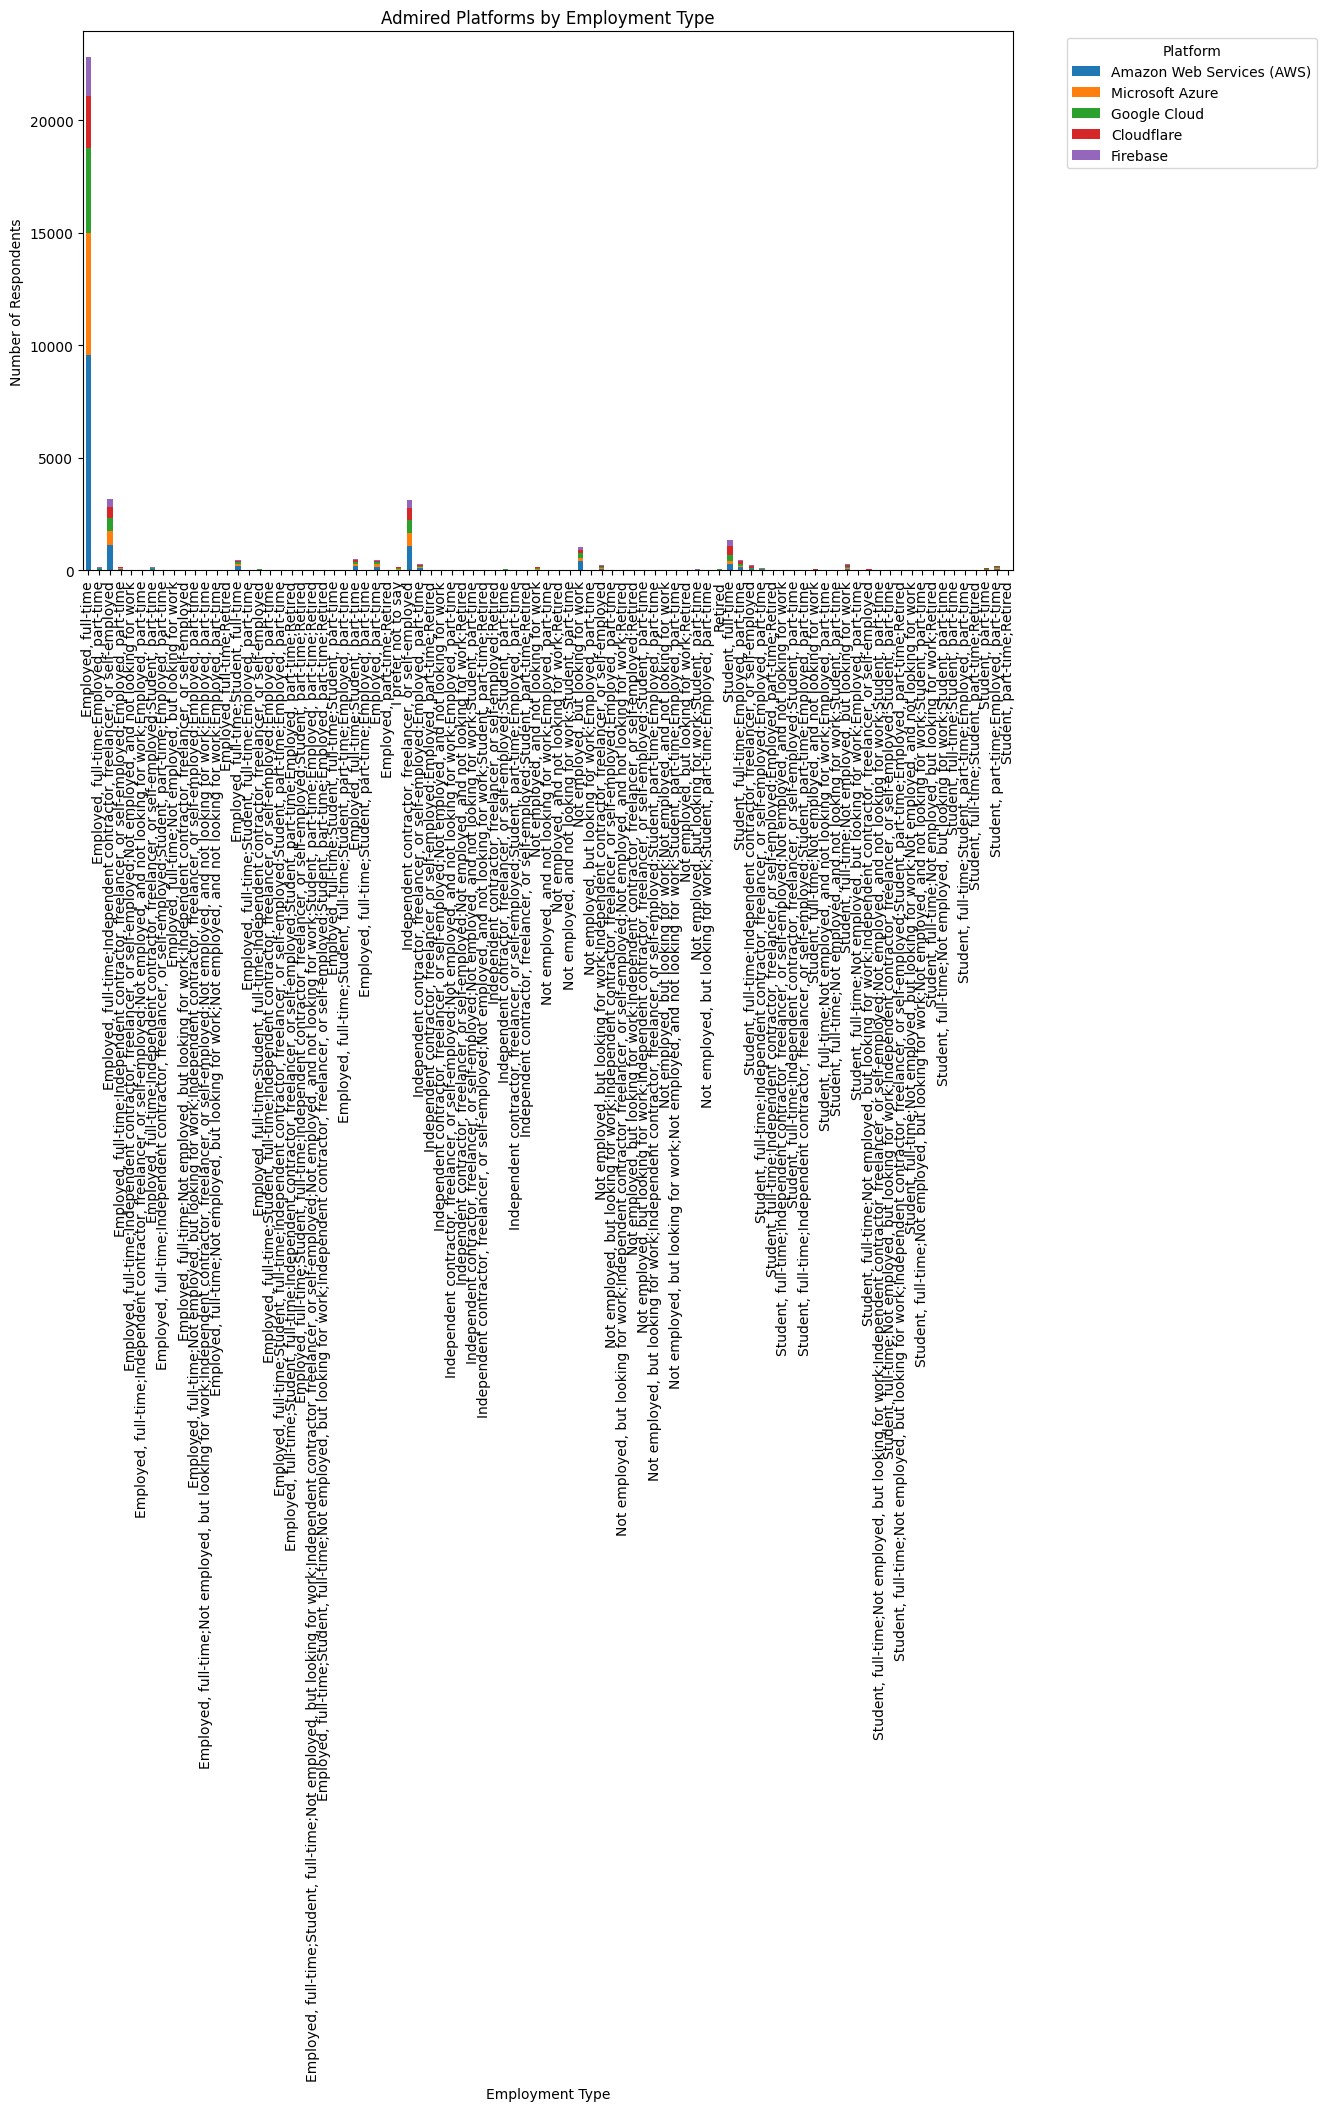

In [12]:
plat_emp = df[['Employment', 'PlatformAdmired']].dropna()
plat_emp_exp = plat_emp.assign(PlatformAdmired=plat_emp['PlatformAdmired'].str.split(';')).explode('PlatformAdmired')

# Count preferences by employment type
plat_emp_counts = plat_emp_exp.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Optional: top 5 platforms overall
top5_platforms = plat_emp_exp['PlatformAdmired'].value_counts().head(5).index
plat_emp_counts_top5 = plat_emp_counts[top5_platforms]

# Plot stacked bar chart
plat_emp_counts_top5.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
